<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prepairing" data-toc-modified-id="Prepairing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prepairing</a></span><ul class="toc-item"><li><span><a href="#Import-all-neccesary" data-toc-modified-id="Import-all-neccesary-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import all neccesary</a></span></li><li><span><a href="#Open-and-learn-the-data" data-toc-modified-id="Open-and-learn-the-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Open and learn the data</a></span></li><li><span><a href="#Convert-the-date-and-time-to-index" data-toc-modified-id="Convert-the-date-and-time-to-index-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Convert the date and time to index</a></span></li><li><span><a href="#Check-of-soritng-the-index" data-toc-modified-id="Check-of-soritng-the-index-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Check of soritng the index</a></span></li><li><span><a href="#Resample-the-data" data-toc-modified-id="Resample-the-data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Resample the data</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Study-stationarity" data-toc-modified-id="Study-stationarity-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Study stationarity</a></span></li><li><span><a href="#Изучим-сезонность" data-toc-modified-id="Изучим-сезонность-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучим сезонность</a></span></li><li><span><a href="#Intermediate-output" data-toc-modified-id="Intermediate-output-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Intermediate output</a></span></li></ul></li><li><span><a href="#Learning" data-toc-modified-id="Learning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Learning</a></span><ul class="toc-item"><li><span><a href="#Create-features-for-learning" data-toc-modified-id="Create-features-for-learning-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create features for learning</a></span><ul class="toc-item"><li><span><a href="#Let's-define-the-features-and-goals-of-learning" data-toc-modified-id="Let's-define-the-features-and-goals-of-learning-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Let's define the features and goals of learning</a></span></li></ul></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Decision-Tree-Regressor" data-toc-modified-id="Decision-Tree-Regressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Decision Tree Regressor</a></span></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#Results-compare" data-toc-modified-id="Results-compare-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Results compare</a></span></li><li><span><a href="#Choosing-the-best-model" data-toc-modified-id="Choosing-the-best-model-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Choosing the best model</a></span></li></ul></li><li><span><a href="#Testing" data-toc-modified-id="Testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Testing</a></span></li><li><span><a href="#General-conclusion" data-toc-modified-id="General-conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>General conclusion</a></span></li></ul></div>

#  Forecasting taxi orders

The Clear Taxi company has collected historical data on taxi orders at airports. To attract more drivers during the peak period, you need to predict the number of taxi orders for the next hour. Build a model for such a prediction.

The value of the *RMSE* metric on the test set should not exceed 48.

You need:

1. Load the data and resample it one hour at a time.
2. Analyze the data.
3. Train different models with different hyperparameters. Make a test sample of 10% of the original data.
4. Check the data on the test sample and draw conclusions.


## Prepairing

### Import all neccesary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

state = 12345

### Open and learn the data

In [2]:
data = pd.read_csv ('taxi.csv')
print (data.head(10))
data.info()

              datetime  num_orders
0  2018-03-01 00:00:00           9
1  2018-03-01 00:10:00          14
2  2018-03-01 00:20:00          28
3  2018-03-01 00:30:00          20
4  2018-03-01 00:40:00          32
5  2018-03-01 00:50:00          21
6  2018-03-01 01:00:00           7
7  2018-03-01 01:10:00           5
8  2018-03-01 01:20:00          17
9  2018-03-01 01:30:00          12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


Check the columns:
- datetime - the date and the name of the taxi order, apparently they are in order, it will be necessary to check. There are no passes.
- num_orders - number of orders on the specified date and time. There are no passes.

### Convert the date and time to index

In [3]:
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.set_index(['datetime'])
data

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


The date and time have become an index, starting on March 1, 2018 (2018-03-01), and ending on August 31, 2018 (2018-08-01).

### Check of soritng the index

In [4]:
print(data.index.is_monotonic)

True


Data sorted, nothing needs to be sorted more

### Resample the data

The frequency of the data is 10 minutes, we will resample up to 1 hour.

In [5]:
data = data.resample('1H').sum()
data

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


In [6]:
data.isna().sum()

num_orders    0
dtype: int64

There is no NaNs

## Analysis

### Study stationarity

Let's study the data on the chart

<AxesSubplot:xlabel='datetime'>

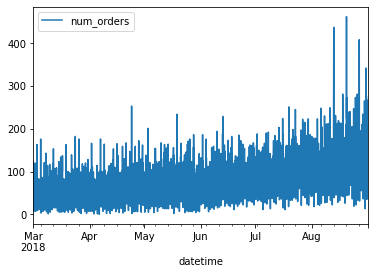

In [7]:
data.plot()

Let's try to smooth the time series. Let's make a new dataset so that the original remains untouched.

In [8]:
data_new = data.copy()
data_new['rolling_mean'] = data_new.rolling(10).mean()

<AxesSubplot:xlabel='datetime'>

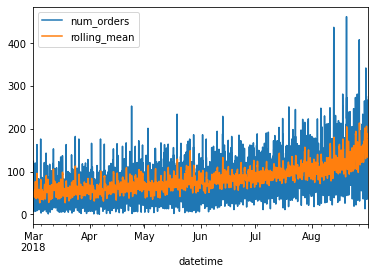

In [9]:
data_new.plot()

At first glance, the time series is not stationary. Let's try to apply another shift.

In [10]:
data_new = data_new - data_new.shift(fill_value = 0)

<AxesSubplot:xlabel='datetime'>

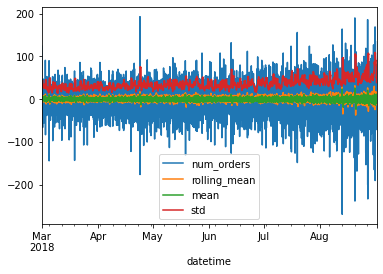

In [11]:
data_new['mean'] = data_new['num_orders'].rolling(15).mean()
data_new['std'] = data_new['num_orders'].rolling(15).std()

data_new.plot()

### Изучим сезонность

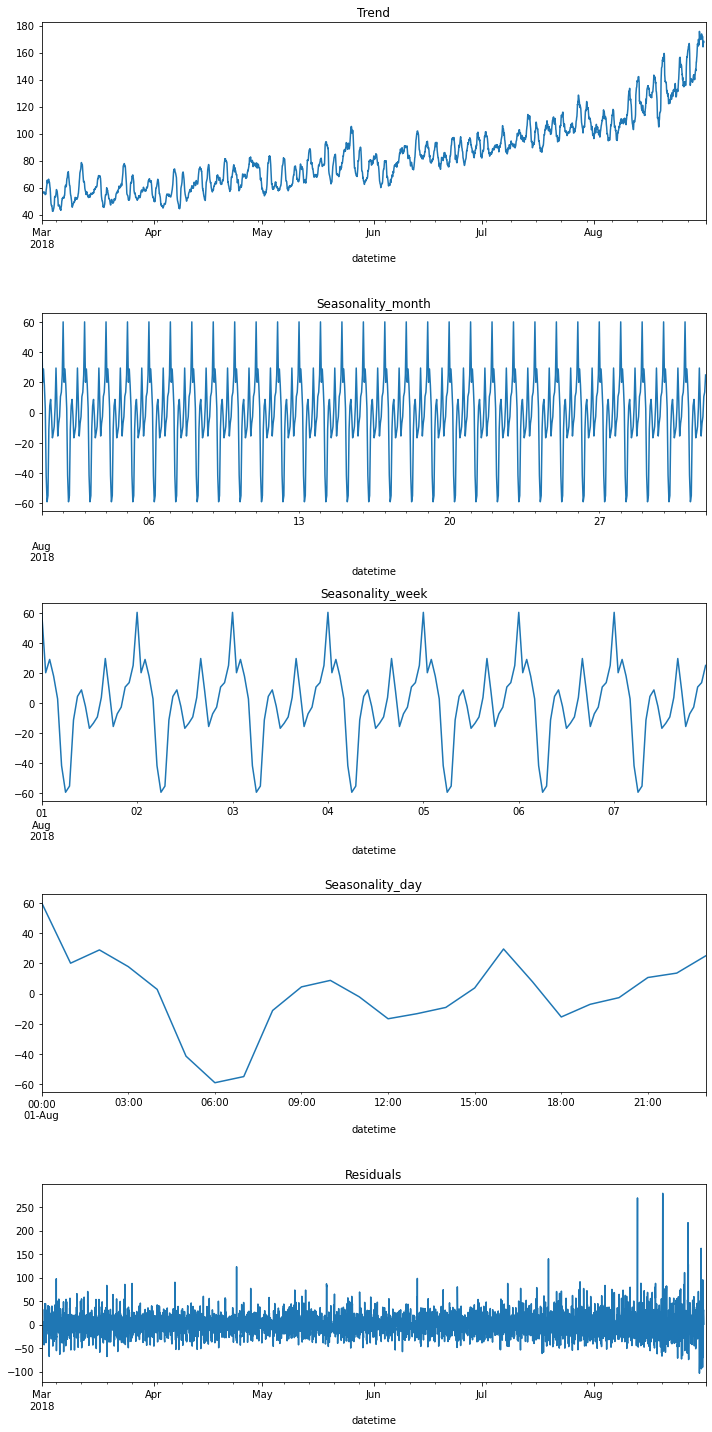

In [12]:
decomposed = seasonal_decompose(data)

# smooth change in the average value of the series without repeating patterns
plt.figure (figsize = (10, 20))
plt.subplot (511)
decomposed.trend.plot (ax = plt.gca())
plt.title('Trend') 

# cyclically repeating patterns during the month
plt.subplot(512)
decomposed.seasonal['2018-08-01':'2018-08-31'].plot(ax = plt.gca())
plt.title('Seasonality_month') 

# cycling patterns throughout the week
plt.subplot(513)
decomposed.seasonal['2018-08-01':'2018-08-07'].plot(ax = plt.gca())
plt.title('Seasonality_week')  

# cyclically repeating patterns throughout the day
plt.subplot(514)
decomposed.seasonal['2018-08-01'].plot(ax = plt.gca())
plt.title('Seasonality_day') 

# component that is not explained by trend and seasonality - noise
plt.subplot(515)
decomposed.resid.plot(ax = plt.gca()) 
plt.title('Residuals') 
plt.tight_layout()

### Intermediate output

1. The time series is stationary, you can make predictions using models.
2. Since we only have data for 6 months, it is impossible to see seasonality over the years. Only by month, time of day or day of the week.
3. According to the "Trend" chart, you can see that the number of taxi orders increases from the beginning of March to the end of August. Trend usually shows seasonality by year, so it's not here.
4. Seasonality "within" the month (January is studied) does not give us any information, we need to study the week, this will give more detailed information.
5. Also, inclusion in the signs of the months will not give anything, since the number of taxi orders from January to March is slightly increasing.
5. The "Seasonality_week" chart shows that the picture of the number of orders does not change depending on the day of the week.
6. According to the "Seasonality_day" chart, we can mark the peak activity. The minimum number of orders falls at 6 am, the maximum at 12 at night. Also a high number of orders in the evening (4-5 pm). Take orders throughout the day for signs and learning goals
7. Residuals (noise) are inexplicable. At the same time, at the end of August we have many strange attacks.
8. Among other things, you can see that by the end of August, the values ​​are significantly creeping up relative to the entire time period.

## Learning

Let's create a summary table of results in advance

In [13]:
result_rmse = pd.DataFrame (columns = ['Model_name', 'RMSE'])

### Create features for learning

In [14]:
def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

make_features(data, 25, 7)    

#### Let's define the features and goals of learning

In [15]:
# divide the dataset into samples
train, test = train_test_split (data, shuffle = False, test_size = 0.1)
train, valid = train_test_split (train, shuffle = False, test_size = 0.1)

train = train.dropna()

# define signs of learning
train_features = train.drop('num_orders', axis = 1)
valid_features = valid.drop('num_orders', axis = 1)
test_features = test.drop('num_orders', axis = 1)

# define learning objectives
train_target = train['num_orders']
valid_target = valid['num_orders']
test_target = test['num_orders']

For modeling, regression models were chosen, since the target attribute
quantitative, not qualitative:
- Linear Regression - LinearRegression
- Decision Tree Regressor - DecisionTreeRegressor

### Linear Regression

In [16]:
LR = LinearRegression()
LR.fit(train_features, train_target)

pred_valid = LR.predict(valid_features)

valid_RMSE_LR = np.sqrt(mean_squared_error(valid_target, pred_valid)) 
print("RMSE =", round (valid_RMSE_LR, 2))

result_rmse.loc[0, 'Model_name'] = 'LinearRegression'
result_rmse.loc[0, 'RMSE'] = round (valid_RMSE_LR, 2)

RMSE = 34.45


### Decision Tree Regressor

Selecting decision tree hyperparameters

In [17]:
best_result_tree = 48
best_depth = 0
best_leaf = 0

for leaf in range(1, 15):
    for depth in range(1, 15):
        model = DecisionTreeRegressor(max_depth = depth, min_samples_leaf = leaf, random_state = state)
        model.fit(train_features, train_target)
        pred_valid = model.predict(valid_features)
        result = np.sqrt(mean_squared_error(valid_target, pred_valid))

        if result < best_result_tree:
            best_depth = depth
            best_leaf = leaf

print('best_depth:', best_depth)
print('best_leaf:', best_leaf)

best_depth: 14
best_leaf: 14


Calculating the RMSE of the decision tree

In [18]:
DTR = DecisionTreeRegressor(max_depth = 14, min_samples_leaf = 14, random_state = state)
DTR.fit(train_features, train_target)

pred_valid = DTR.predict(valid_features)

valid_RMSE_DTR = np.sqrt(mean_squared_error(valid_target, pred_valid)) 
print("RMSE =", round (valid_RMSE_DTR, 2))

result_rmse.loc[1, 'Model_name'] = 'DecisionTreeRegression'
result_rmse.loc[1, 'RMSE'] = round (valid_RMSE_DTR, 2)

RMSE = 36.11


### Random Forest Regressor

Selecting the hyperparameters of the random forest

In [19]:
best_result_est = 48
best_depth = 0
best_est = 0

for est in range(1, 10):
    for depth in range(1, 10):
        model = RandomForestRegressor(random_state = state, n_estimators = est, max_depth = depth)
        model.fit(train_features, train_target)
        pred_valid = model.predict(valid_features)
        result = np.sqrt(mean_squared_error(valid_target, pred_valid))

        if result < best_result_est:
            best_depth = depth
            best_est = est

print('best_depth:', best_depth)
print('best_est:', best_est)

best_depth: 9
best_est: 9


Calculating RMSE of Random Forest

In [20]:
RFR = RandomForestRegressor(random_state = state, n_estimators = 9, max_depth = 9)
RFR.fit(train_features, train_target)

pred_valid = RFR.predict(valid_features)

valid_RMSE_RFR = np.sqrt(mean_squared_error(valid_target, pred_valid)) 
print("RMSE =", round (valid_RMSE_RFR, 2))

result_rmse.loc[2, 'Model_name'] = 'RandomForestRegression'
result_rmse.loc[2, 'RMSE'] = round (valid_RMSE_RFR, 2)

RMSE = 33.93


### LGBMRegressor

In [21]:
LGBMR = LGBMRegressor(boosting_type = 'gbdt', num_leaves = 31, max_depth = 12, learning_rate = 0.2,
                      n_estimators = 100, random_state = state)
LGBMR.fit(train_features, train_target)

pred_valid = LGBMR.predict(valid_features)

valid_RMSE_LGBMR = np.sqrt(mean_squared_error(valid_target, pred_valid)) 
print("RMSE =", round (valid_RMSE_LGBMR, 2))

result_rmse.loc[3, 'Model_name'] = 'LGBMRegressor'
result_rmse.loc[3, 'RMSE'] = round (valid_RMSE_LGBMR, 2)

RMSE = 31.47


### CatBoostRegressor

In [22]:
CB = CatBoostRegressor (loss_function = 'RMSE', iterations = 100, silent = True)
CB.fit(train_features, train_target)

pred_valid = CB.predict(valid_features)

valid_RMSE_CB = np.sqrt(mean_squared_error(valid_target, pred_valid)) 
print("RMSE =", round (valid_RMSE_CB, 2))

result_rmse.loc[4, 'Model_name'] = 'CatBoostRegressor'
result_rmse.loc[4, 'RMSE'] = round (valid_RMSE_CB, 2)

RMSE = 31.69


### Results compare

In [23]:
result_rmse.sort_values('RMSE')

,Model_name,RMSE
3,LGBMRegressor,31.47
4,CatBoostRegressor,31.69
2,RandomForestRegression,33.93
0,LinearRegression,34.45
1,DecisionTreeRegression,36.11


### Choosing the best model

- The smallest value of the RMSE metric was shown by the LGBMRegressor model.
- The CatBoostRegressor model has a slightly higher metric, but it is much faster than LGBM, and therefore we will choose it as a better model.
- The rest of the models have higher RMSE, and we need to spend time on the selection of hyperparameters, so we do not consider them.

## Testing

Checking the chosen model on a test sample.

In [24]:
CB = CatBoostRegressor (loss_function = 'RMSE', iterations = 100, silent = True)
CB.fit(train_features, train_target)

pred_test_CB = CB.predict(test_features)

test_RMSE_CB = np.sqrt(mean_squared_error(test_target, pred_test_CB)) 
print("RMSE =", round (test_RMSE_CB, 2))


RMSE = 46.44


The increased RMSE metric relative to the validation sample is due to the fact that by the end of August the values are much higher than at the beginning of the sample and there are many values samples.

Seeing a graph comparing predictions and real values

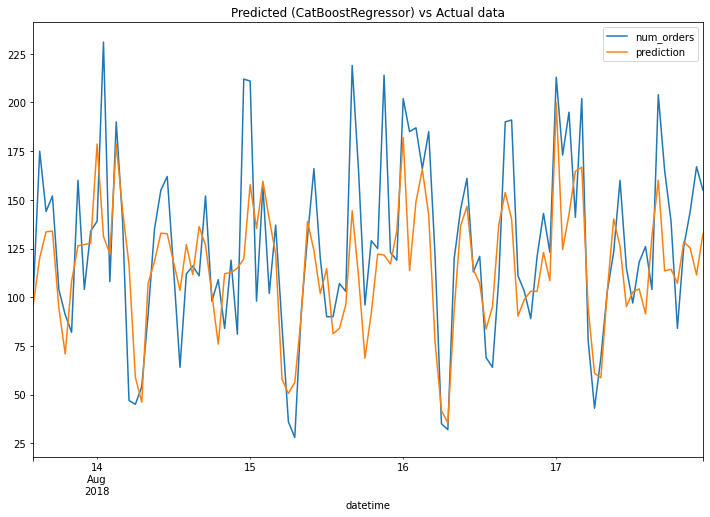

In [25]:
test_plot = test.copy()
test_plot['prediction'] = pred_test_CB
predict_plot = test_plot[['num_orders', 'prediction']]['2018-08-12':'2018-08-17'].plot(
                                                                   kind = 'line', figsize = (12, 8), grid = False)
plt.title('Predicted (CatBoostRegressor) vs Actual data')
plt.show()

The graph shows that our prediction values almost completely repeat the real values.

## General conclusion

- The data is open and studied.
- Data analyzed and resampled.
- Created additional features for training models.
- Various models were trained and analyzed on the validation set.
- The CatBoostRegressor model was recognized as the best model.
- The best model was tested on the test sample and the RMSE metric was 46.44.